84


C:\Users\zcbtjro\Downloads\Python2.7\python-2.7.9.amd64\lib\site-packages\skimage\filter\__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


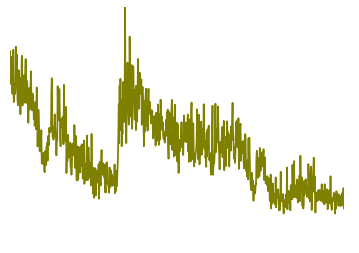

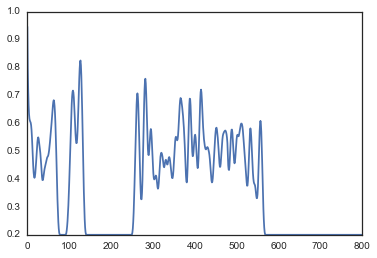

(95L, 800L)

In [2]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import optimize
from scipy import *
from scipy import stats
import haussmeister as hsm
from fluro_csv import fluro
import seaborn as sns

sns.set_style("white")

def x_axis(x):
    return range(0, len(x))

def smooth(x,window_len=20,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

with open('C:\\Users\\zcbtjro\\Data\\MFB_running\\step cycles\\MFB_1_0017.xls') as f:
    f.readline()
    lista = []
    for i in f:
        i.split(',')
        lista.append(i)
      
    
listb = []    
for i in range(0, len(lista)):
    x = lista[i].split() 
    listb.append(x)
    
xvals = []
yvals = []

for i in range(0, len(listb)):
    x = listb[i][-2]
    xvals.append(x)
    y = listb[i][-1]
    yvals.append(y)
    
xvals = map(float, xvals)
yvals = map(float, yvals)

xvals = np.array(xvals)
yvals = np.array(yvals)



def between(l1,low,high):
    l2 = []
    for i in l1[:,0]:
        if(i > low and i < high):
            l2.append(i)
    return l2

def waver(xvals, yvals, minix, maxix, miniy, maxiy):
    
    minix = minix * 2.55
    maxix = maxix * 2.55
    miniy = miniy * 3.75
    maxiy = maxiy * 3.75
    
    masked = ma.masked_greater(xvals, minix)
    maskeda = ma.masked_less(xvals, maxix)

    c = yvals * masked.mask
    f = c * maskeda.mask

    maskedb = ma.masked_greater(yvals, miniy)
    maskedc = ma.masked_less(yvals, maxiy)

    d = f * maskedb.mask
    e = d * maskedc.mask

    finmask = ma.masked_greater(e, 0)

    xzeros = xvals * finmask.mask
    yzeros = yvals * finmask.mask

    b = zip(xzeros, yzeros)

    zerosarr = np.array(b)

    return finmask

#arr = np.array(coords)

distance = []

for i in range(0, len(xvals)):
    
    dis = xvals[i] - xvals[i-1] + i * 100
    distance.append(dis)



raw, DFoF, v = fluro('C:\\Users\\zcbtjro\\Data\\MFB_running\\CSVs\\MFB_01_001.csv')

vidrecorded = len(yvals)
flutrimmed = []
for i in range(0, len(raw)):
    flut = raw[i][0:vidrecorded]
    flutrimmed.append(flut)

diffx = [x - 145 for x in xvals]
    
diffy = [x - 200 for x in yvals]

diffx = [abs(k) for k in diffx]
diffy = [abs(k) for k in diffy]


mapx = []
mapy = []
xpos = 0.9 * diffx[0]
ypos = 0.9 * diffy[0]

for i in range(0, len(diffx)):
    xpos = 0.9 * diffx[i] + 0.1 * xpos
    mapx.append(xpos)
    
for i in range(0, len(diffy)):
    ypos = 0.9 * diffy[i] + 0.1 * ypos
    mapy.append(ypos)
  



mapten = waver(mapx, mapy, 90, 110, 15, 20)

g = mapten.mask.astype(int)

h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

tens = (mapx * b) 
tens = [x + 0.1 for x in tens]

mapnine = waver(mapx, mapy, 90, 110, 10, 14.9999)

g = mapnine.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

nines = (tens * b)
nines = [x + 0.1 for x in nines]

mapeight = waver(mapx, mapy, 60, 89.9999, 15, 20)

g = mapeight.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

eights = (nines * b)
eights = [x + 0.1 for x in eights]

mapseven = waver(mapx, mapy, 90, 110, 0, 9.9999)

g = mapseven.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

sevens = (eights * b)
sevens = [x + 0.1 for x in sevens]

maplol = waver(mapx, mapy, 0, 59.9999, 15, 20)

g = maplol.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

lols = (sevens * b)
lols = [x + 0.1 for x in lols]


mapsix = waver(mapx, mapy, 70, 89.999, 9, 14.9999)

g = mapsix.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

sixs = (lols * b)
sixs = [x + 0.1 for x in sixs]

mapfive = waver(mapx, mapy, 90, 110, 0, 8.9999)

g = mapfive.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

fives = (sixs * b)
fives = [x + 0.1 for x in fives]

mapfour = waver(mapx, mapy, 55, 89.9999, 0, 8.99999)

g = mapfour.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

fours = (fives * b)
fours = [x + 0.1 for x in fours]

mapthree = waver(mapx, mapy, 0, 89.99999, 7, 14.999999)

g = mapthree.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

threes = (fours * b)
threes = [x + 0.1 for x in threes]

maptwo = waver(mapx, mapy, 27, 54.999999, 0, 6.999999)

g = maptwo.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

twos = (threes * b)
twos = [x + 0.1 for x in twos]

mapone = waver(mapx, mapy, 0, 26.99999, 0, 6.999999)

g = mapone.mask.astype(int)
h = np.where(g==1,2,g)
j = np.where(h==0,1,h)
b = np.where(j==2,0,j)

motionindex = (twos * b)
diffx = np.array(diffx)
mapx = np.array(mapx)
motionindex = np.array(motionindex)

smoothedmotion = smooth(motionindex)

binned = stats.binned_statistic(range(0,len(smoothedmotion)), smoothedmotion, statistic='mean', bins = len(DFoF[0]), range=None)
binnedarr = np.array(binned[0])

smoothedflu = []

#binnedarr = np.fliplr([binnedarr])[0]

for i in range(0, len(raw)):
    smot = smooth(raw[i])
    smoothedflu.append(smot)

ranks = []
probs = []

for i in range(0, len(raw)):
    rho, pval = stats.spearmanr(binnedarr, DFoF[i])
    ranks.append(rho)
    probs.append(pval)
    

sigprobs = [] 

for p in probs:
    if p < 0.05:
        sigprobs.append(p)

print len(sigprobs)

x = range(0, len(binnedarr))
time = []
for i in x:
    t = i/15.625
    time.append(t)

fig = plt.figure(frameon = False)

# f, axarr = plt.subplots(1, sharex = True, sharey = True)

# # for i in range(0, 5):
# #        fig = axarr[i].plot(v[i], DFoF[i], c=np.random.rand(3,1))
# #        axarr[i].axes.get_yaxis().set_visible(False)
# # plt.show() 


f, axarr = plt.subplots(1, sharex = True, sharey = True)

fig = axarr.plot(v[6], DFoF[6], c='olive')
axarr.axes.get_yaxis().set_visible(False)
axarr.axis('off')
plt.savefig('index_correlated_trace_4')

with open('DFoF.csv','wb') as f:
    for j in DFoF:
        f.write("%s\n" % j)

plt.figure()        
plt.plot(x_axis(binnedarr), binnedarr)
plt.show()

DFoF.shape

# plt.close('all')
# fig = plt.figure(frameon = False) 
# ax = fig.add_axes([0, 0, 1, 1])
# ax.axis('off')
# ax.set_ylim([0,1])    
# ax.plot(time, binnedarr)
# plt.savefig("motion_index_withaxis.png")
# plt.show()

#print ranks

# plt.figure()
# plt.plot(range(0, len(ranks)), ranks, '.')
# plt.show()

# plt.figure()
# plt.plot(x_axis(ranks), ranks, '.')
# plt.show()

(95L, 1599L)
(95L, 2L, 1599L)
['not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'significant', 'not', 'significant', 'not', 'not', 'not', 'not', 'not', 'not', 'significant', 'not', 'not', 'not', 'not', 'significant', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'significant', 'not', 'significant', 'not', 'not', 'not']


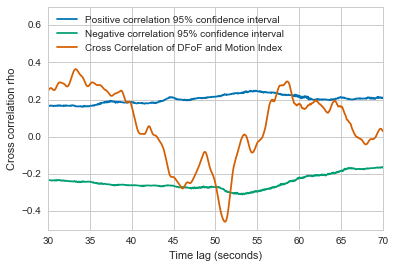

In [195]:
import peasoup as ps
import seaborn as sns
current_palette = sns.color_palette('deep')
sns.set_style("whitegrid")

def x_axis(x):
    u =  range(0, len(x))
    u = np.array(u)
    j = u / 15.625
    return j

def sig(motionindex, cc, low, high):
    times = np.arange(-len(motionindex), len(motionindex))
    m=np.mean(cc)
    am = np.argmax(cc)
    maxi = np.max(cc)
    tmax=times[am]
    if tmax > -30 and tmax < 30:
        if maxi > 0.1:
            if 0.865*abs(maxi - m) > high[am]:
                return 'significant'
            else:
                return 'not'
        else:
            return 'not'
    else:
        return 'not'

def sig_low(motionindex, cc, low, high):
    times = np.arange(-len(motionindex), len(motionindex))
    m=np.mean(cc)
    am = np.argmin(cc)
    mini = np.min(cc)
    tmin=times[am]
    if tmin > -30 and tmin < 30:
        if mini < -0.1:
            if 1*(mini ) < low[am]:
                return 'significant'
            else:
                return 'not'
        else:
            return 'not'
    else:
        return 'not'

    
    
    
    
    
    
    
    
normDFoF = []

                
for i in range(0, len(DFoF)):
    normD = ps.normalize(DFoF[i], mode = 'normint')
    normDFoF.append(normD)

normmotionindex = ps.normalize(binnedarr, mode = 'normint')


correlations = []

for i in range(0, len(normDFoF)):
    corr =  ps.cross_correlate(normDFoF[i], normmotionindex)
    correlations.append(corr)

o = np.array(correlations)

print o.shape
    
# high = []
# low = []
# boot = np.empty((len(normDFoF),2))
# for i in range(0, len(normDFoF)):
boot = np.array([ps.bootstrap5(normDFoF[i], 250, 0.05, normmotionindex) for i in range(len(normDFoF))])
#     high.append[x]
#     low.append[y]

print boot.shape

sigs = [sig(binnedarr, correlations[i], boot[i,0,:], boot[i,1,:]) for i in range(len(boot))]
   
siglows = [sig_low(binnedarr, correlations[i], boot[i,0,:], boot[i,1,:]) for i in range(len(boot))]

print siglows




# plt.figure()
# plt.plot(x_axis(p), p, '.')
# plt.show()

with sns.color_palette("colorblind", 8):
    fig1 = plt.figure()
    ax = fig1.add_subplot(1,1,1)
    ax.set_xlim(30,70)
    ax.set_ylim(-0.5, 0.7)
    upper = plt.plot(x_axis(boot[i,1,:]), boot[i,1,:], label = 'Positive correlation 95% confidence interval')
    lower = plt.plot(x_axis(boot[i,0,:]), boot[i,0,:], label = 'Negative correlation 95% confidence interval')
    ax.set_xlabel('Time lag (seconds)')
    ax.set_ylabel('Cross correlation rho')
    coore = plt.plot(x_axis(correlations[89]), correlations[89], label = 'Cross Correlation of DFoF and Motion Index ')
    ax.legend(loc = 'upper left')
    plt.savefig("bootstrap_motionindex.png")
    
    plt.show()

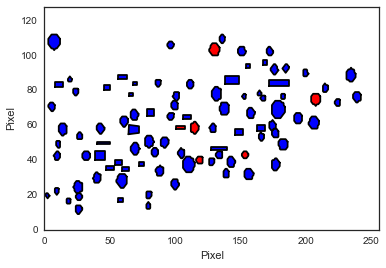

In [196]:
from scipy import stats
import sima
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import pickle
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sns.set_style("white")
sns.set_palette("dark")

dataset = sima.ImagingDataset.load('C:\\Users\\zcbtjro\\Data\\MFB_running\\tifs\\MFB_01_001.tif.sima')

rois = dataset.ROIs['manual_ROIs']

polys = []

for i in range(len(rois)):
    c = rois[i].coords
    d = np.array(c)
    polys.append(d)

sigs = np.array(sigs)

first = np.where(sigs=='significant',1,sigs)
boolsig = np.where(first=='not',0,first)

siglows = np.array(siglows)
firstlow = np.where(siglows=='significant',1,siglows)
boolsiglow = np.where(firstlow=='not',0,firstlow)


maxes = []

for i in range(len(correlations)):
    if np.mean(correlations[i]) > 0:
        maxes.append(np.max(correlations[i]))
    else:
        maxes.append(np.min(correlations[i]))
        

maxes = np.nan_to_num(maxes)

patches = []
fig, ax = plt.subplots()

for i in range(0, len(rois)): #loop over polygon
    x = polys[i][:,:,0][0]#get all x coord of one polygon
    y = polys[i][:,:,1][0] #get all y coord of one polygon
    plt.plot(x,y,"k")
    polygon = Polygon(np.array([x,y]).T, closed=True) #get one single polygon
    patches.append(polygon)
    
colors = np.array(map(float,boolsiglow)) #convert to float

p = PatchCollection(patches, cmap = plt.cm.bwr)
p.set_array(colors)
ax.add_collection(p)

# col = plt.colorbar(p)
# col.set_label('Peak cross correlation rho')
plt.xlim(0, 256)
plt.ylim(0,128)
ax.set_xlabel('Pixel')
ax.set_ylabel('Pixel')
plt.savefig("MFB_01_001_spatial_anticorrelated_significance.png")

#plt.legend(marker = 'o', color = 'blue', numpoints = 1, loc=1)
plt.show()

# with open('rho_1.txt','wb') as f:
#     for j in maxes:
#         f.write("%s\n" % j)
    
#     f.close()

# ax = sns.distplot(maxes, bins = 10, norm_hist = False, kde_kws = {'label' : 'gaussian kernal density estimate'})  
# sns.despine()
# ax.set_xlim(-1, 1)  
# ax.set_xlabel('Peak cross correlation rho')
# ax.set_ylabel('Relative frequency')
# plt.savefig('cross_correlations_max.png')


34


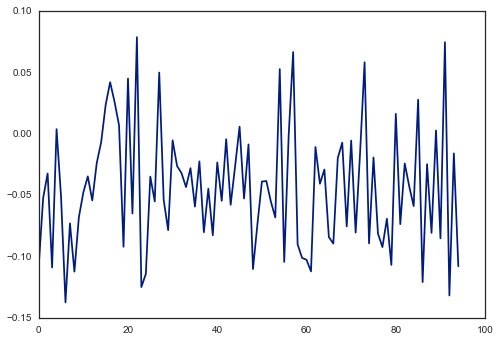

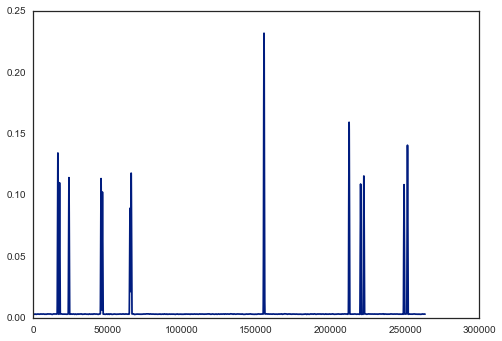

In [13]:
from scipy.io import loadmat
from scipy import stats
import sima
from sima.imaging import ImagingDataset
from sima.ROI import ROI
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

sns.set_style("white")
sns.set_palette("dark")

def smooth(x,window_len=1000,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

def x_axis(x):
    return range(0, len(x))

data= np.fromfile('C:\\Users\\zcbtjro\\Data\MFB_running\\speedposition\\MFB_01\\Stim_1_speed.dat', '>d')
x = range(0, len(data))
absdata = [abs(k) for k in data]
absdata = np.array(absdata)

smoothed = smooth(absdata)
recorded = 800 / 15.18 * 5000
trimmed = smoothed[0:recorded]

frames = len(smoothed) / 5000 * 15.18

binned = stats.binned_statistic(range(0,len(trimmed)), trimmed, statistic='mean', bins = len(DFoF[0]), range=None)
binnedarr = np.array(binned[0])

ranks = []
probs = []


for i in range(0, len(raw)):
    rho, pval = stats.spearmanr(binnedarr, DFoF[i])
    ranks.append(rho)
    probs.append(pval)
    
sigprobs = [] 

for p in probs:
    if p < 0.05:
        sigprobs.append(p)
 
print len(sigprobs)

plt.figure()
plt.plot(x_axis(ranks), ranks)

plt.figure()
plt.plot(x_axis(trimmed), trimmed)
        
        